In [103]:
from sklearn.datasets import make_circles
n_samples =1000

In [109]:
X,y= make_circles(n_samples,noise=0.3)

In [110]:
X

array([[ 0.84099682,  0.23879203],
       [ 0.22165241, -0.89482668],
       [ 1.1722012 ,  0.17693607],
       [ 0.64007123, -0.60440061],
       [-0.17419136, -0.35656741],
       [-0.69297887,  0.22991801],
       [ 1.1620719 , -0.15303497],
       [ 1.07845387, -0.10477695],
       [ 0.01742884,  0.65745007],
       [-0.16651909, -0.05564154],
       [ 1.13841672,  0.19399757],
       [-0.99326345, -0.02989222],
       [-0.40282066, -0.80341321],
       [-1.18856606, -0.01937031],
       [-0.20993612,  0.43404472],
       [-0.20765249, -0.69408393],
       [-0.72416835,  0.25537412],
       [ 1.06274745, -0.66470323],
       [-0.46502913, -1.2464751 ],
       [-0.59282497,  0.04488525],
       [-0.32613456,  0.59432764],
       [ 0.39660059, -0.86748999],
       [-0.66833445,  0.89419768],
       [ 0.28748332, -0.43783404],
       [ 0.03893036,  1.35653856],
       [-0.28991287,  1.00931626],
       [ 0.58377886,  0.89517267],
       [ 0.21416539,  0.70085542],
       [-0.52132143,

In [111]:
y

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [112]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.840997,0.238792,0
1,0.221652,-0.894827,1
2,1.172201,0.176936,1
3,0.640071,-0.604401,1
4,-0.174191,-0.356567,0
...,...,...,...
95,0.251952,-1.283097,0
96,0.310381,0.626898,0
97,1.224415,-0.530847,0
98,-0.879127,-0.506255,1


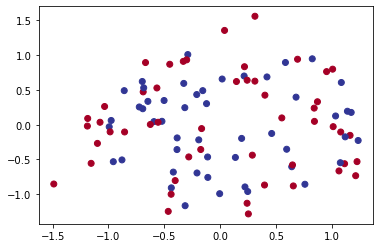

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
import tensorflow as tf

tf.random.set_seed(42)


model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])


model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.SGD(),
metrics=["accuracy"]
)


model_1.fit(X,y,epochs=5)



Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 2.4716 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6963 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6944 - accuracy: 0.4920


In [9]:
model_1.fit(X,y,epochs=200,verbose=0)

In [10]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934647560119629, 0.5]

In [11]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])


model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.SGD(),
metrics=["accuracy"]
)


model_2.fit(X,y,epochs=100,verbose=0)

In [12]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 662us/step - loss: 0.6933 - accuracy: 0.5000


[0.6933214068412781, 0.5]

In [36]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),#activation="relu"),
    tf.keras.layers.Dense(10),#activation="relu"),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(),
metrics=["accuracy"]
)

model_3.fit(X,y,epochs=100,verbose=0)

In [37]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 862us/step - loss: 0.7029 - accuracy: 0.5090


[0.7028663754463196, 0.5090000033378601]

In [38]:
import numpy as np

In [54]:

def plot_decision_boundary(model,X,y):
    x_min,x_max=X[:,0].min()-0.1,X[:,0].max()+0.1
    y_min,y_max=X[:,1].min()-0.1,X[:,1].max()+0.1
    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    x_in=np.c_[xx.ravel(),yy.ravel()]

    y_pred = model.predict(x_in)

    if len(y_pred[0])>1:
        print("doing multiclass classification")
        y_pred= np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx,yy, y_pred, cmap = plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


doing binary classification


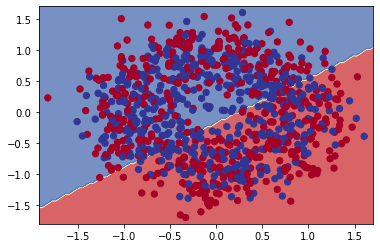

In [55]:
plot_decision_boundary(model= model_3,X=X,y=y)

In [41]:
tf.random.set_seed(42)
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5)

In [42]:
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [43]:
model_3.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: in user code:

    /home/amrith/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:855 train_function  *
        return step_function(self, iterator)
    /home/amrith/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/amrith/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/amrith/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/amrith/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/amrith/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:838 run_step  **
        outputs = model.train_step(data)
    /home/amrith/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 train_step
        y_pred = self(x, training=True)
    /home/amrith/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/amrith/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:251 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_4 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)


In [44]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),#activation="relu"),
    tf.keras.layers.Dense(10),#activation="relu"),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
optimizer=tf.keras.optimizers.Adam(),
metrics=["mae"]
)

model_4.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6830 - mae: 43.6830
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

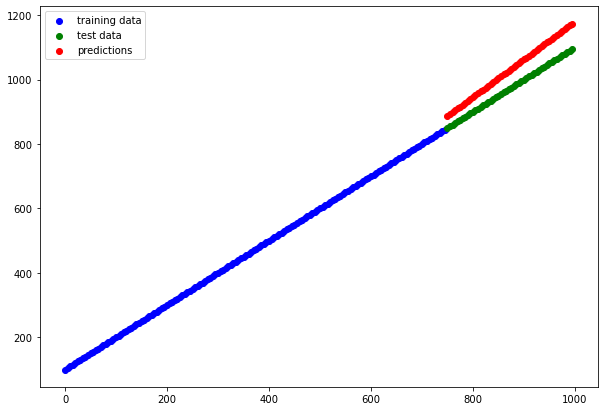

In [45]:
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c="b",label="training data")
plt.scatter(X_reg_test,y_reg_test,c="g",label="test data")
plt.scatter(X_reg_test,y_reg_preds,c="r",label="predictions")

plt.legend()

In [61]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])

model_5.compile(loss="binary_crossentropy",
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2995 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2023 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1228 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0098 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9324 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8826 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8008 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7662 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6024 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5557 - accuracy: 0.4840
Epoch 11/

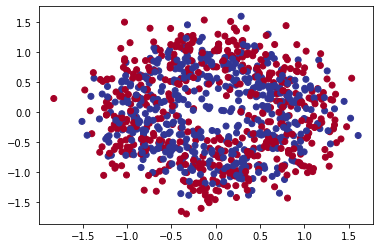

In [63]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

doing binary classification


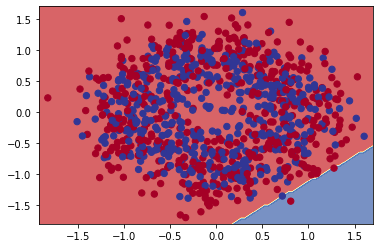

In [64]:
plot_decision_boundary(model=model_5,X=X,y=y)

In [65]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

history=model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2995 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 4.2023 - accuracy: 0.4740
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1228 - accuracy: 0.4740
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 4.0098 - accuracy: 0.4740
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 3.9324 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 894us/step - loss: 3.8826 - accuracy: 0.4770
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.8008 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 927us/step - loss: 3.7662 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 878us/step - loss: 3.6024 - accuracy: 0.4870
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 3.5557 - accuracy: 0.4840
Epo

doing binary classification


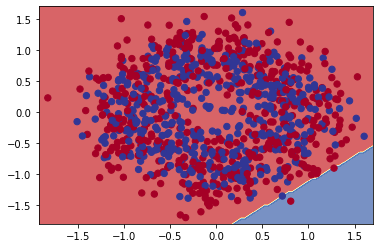

In [71]:
plot_decision_boundary(model=model_6,X=X,y=y)

In [69]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])

model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

history=model_7.fit(X,y,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [70]:
model_7.evaluate(X,y)

32/32 [==============================] - 0s 891us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


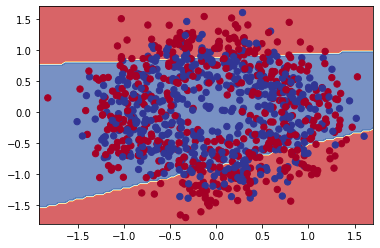

In [72]:
plot_decision_boundary(model=model_7,X=X,y=y)

In [80]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

history=model_8.fit(X,y,epochs=500,verbose=0)

32/32 [==============================] - 0s 689us/step - loss: 0.6512 - accuracy: 0.6120
doing binary classification


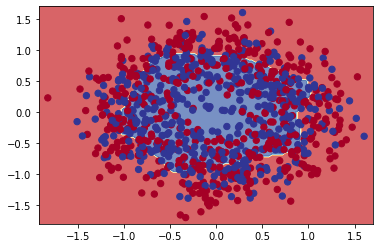

In [81]:
model_8.evaluate(X,y)
plot_decision_boundary(model=model_8,X=X,y=y)

In [84]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train,X_test,y_train,y_test = X[:800],X[800:],y[:800],y[800:]

In [85]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [87]:
tf.random.set_seed(42)
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=["accuracy"])

history=model_9.fit(X_train,y_train,epochs=500)


Epoch 1/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6861 - accuracy: 0.5462
Epoch 2/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6823 - accuracy: 0.5550
Epoch 3/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.5675
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5562
Epoch 5/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6784 - accuracy: 0.5562
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6799 - accuracy: 0.5600
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5675
Epoch 8/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6759 - accuracy: 0.5700
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6765 - accuracy: 0.5713
Epoch 10/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6754 - accuracy: 0.5688
Epoch 11/

7/7 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.5850
doing binary classification


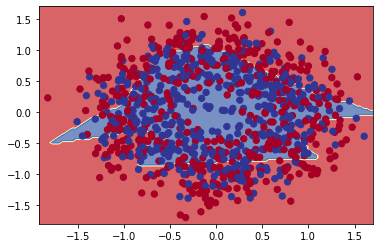

In [88]:
model_9.evaluate(X_test,y_test)
plot_decision_boundary(model=model_9,X=X,y=y)

In [90]:
tf.random.set_seed(42)
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10**(epoch/20))

history=model_10.fit(X_train,y_train,epochs=500,callbacks=[lr_scheduler])


Epoch 1/500
25/25 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4988
Epoch 2/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5063
Epoch 3/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6952 - accuracy: 0.5113
Epoch 4/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5088
Epoch 5/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5138
Epoch 6/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5138
Epoch 7/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5150
Epoch 8/500
25/25 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5200
Epoch 9/500
25/25 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5200
Epoch 10/500
25/25 [==============================] - 0s 2ms/step - loss: 0.6891 - accuracy: 0.5263
Epoch 11/